this will be the note book that i use for this project

In [1]:
# importing pandas and read the cars csv file and creating a dataset from the file
import pandas as pd
df = pd.read_csv('cars.csv')

In [2]:
# using the describe method for the cars dataset
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [3]:
# taking a column and finding the mean, median, & mode
mpg_city = df['Fuel Information.City mpg']
mpg_city.mean()
mpg_city.median()
mpg_city.mode()

# mean is 17.27
# median is 17
# mode is 17

0    17
dtype: int64

In [4]:
# finding a 25% trimmed mean
from scipy import stats
stats.trim_mean(mpg_city, 0.25)

16.901103230890463

<AxesSubplot:ylabel='Frequency'>

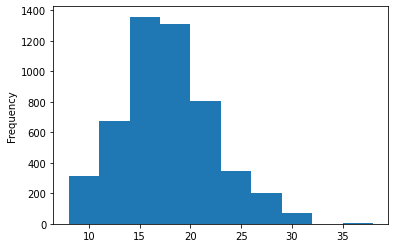

In [5]:
# plotting a histogram
mpg_city.plot(kind='hist')
# with the median and mode both being '17' and the mean being '17.27' we can see that the graph provides a visual validity

In [6]:
# finding the absolute deviation, standard deviation and interquartile range
mpg_city.std()
mpg_city.mad()


3.5156036441518395

<AxesSubplot:>

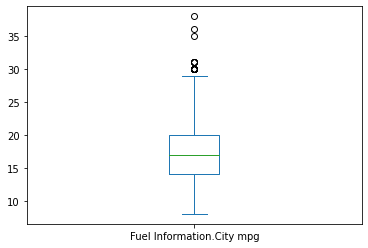

In [7]:
# plotting a box plot and commenting on the 75% and 25% locations in relation to median
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mpg_city.plot.box()

from the above box plot we see the Q3, 75th percentile is approx. 20mpg whereas Q1, 25th percentile is sits around 15mpg. All of the outliers are the more effecient cars above 30mpg. 

In [8]:
# adding a new column of mean spilt

import pandas as pd
import numpy as np
df = pd.read_csv('cars.csv')

#creating a variable for the mpg city column
mpg_city = df['Fuel Information.City mpg']

#creating a variable for the mean of mpg city column
mean = mpg_city.mean()

#creating conditions for new mean_split column
conditions = [
    (mpg_city < 0.5 * mean),
    (mpg_city >= 0.5 * mean) & (mpg_city < mean),
    (mpg_city >= mean)]

choices = ['0', '1', '2']

#creaing new mean split column based on conditions and choices
df['mean_split'] = np.select(conditions, choices)

split = df['mean_split']

mpg_city,split

(0       18
 1       22
 2       21
 3       21
 4       21
         ..
 5071    18
 5072    12
 5073    12
 5074    17
 5075    17
 Name: Fuel Information.City mpg, Length: 5076, dtype: int64,
 0       2
 1       2
 2       2
 3       2
 4       2
        ..
 5071    2
 5072    1
 5073    1
 5074    1
 5075    1
 Name: mean_split, Length: 5076, dtype: object)

<AxesSubplot:>

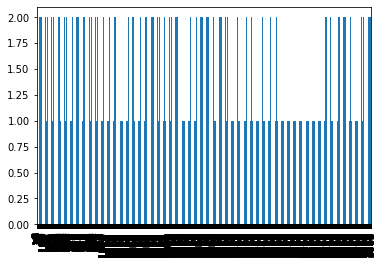

In [9]:
# creating bar plot based on mean split column

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

split = df['mean_split']
splits = pd.to_numeric(split)
splits.plot(kind = 'bar')

In [11]:
# creating new box plot based on mpg city grouped by mean split


In [18]:
# creating new column based on mpg hwy

mpg_hwy = df['Fuel Information.Highway mpg']

corr = mpg_city.corr(mpg_hwy)
print("Correlation between " , 'mpg_city' , " and ", 'mpg_hwy', "is: ", round(corr, 2))

Correlation between  mpg_city  and  mpg_hwy is:  0.87


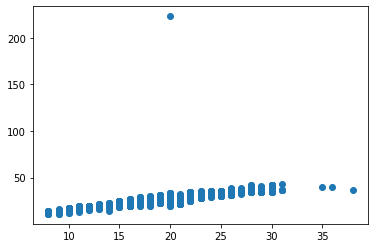

In [25]:
# making scatter plot based on correlation between mpg in city and highway
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(mpg_city, mpg_hwy)

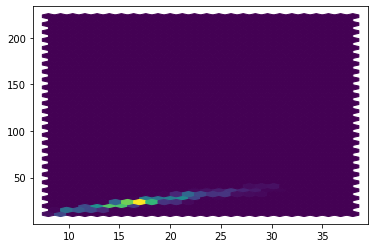

In [28]:
# making hexbin based on correlation between mpg in city and highway

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.hexbin(mpg_city, mpg_hwy, gridsize=(25,25))